## Тестовое Задание (Бриф)

### Задание 1:  
***Имеется набор данных со следующими столбцами:***  
    1) Идентификатор документа  
    2) Идентификатор товара  
    3) Операция документа  
    4) Дата документа  
    5) Идентификатор филиала, создавшего документ  
    
> *Идентификатор товара – уникальный номер единицы товара, находящейся в сервисном центре*

Этот набор данных связан со справочником филиалов. Справочник содержит следующие поля:  
    1) Идентификатор филиала  
    2) Наименование филиала  
    3) Наименование региона филиала  
    
***Необходимо рассчитать среднее время нахождения товара в сервисном центре:   
    1) Общая динамика по месяцам   
    2) Динамика по неделям в разрезе регионов  
Вывести нормативный срок по всей компании.  
Графически представить динамику отклонения от нормы по каждому региону.***

### Задание 2:  
Вы работаете сотрудником, осуществляющим прием клиентов в сервисном центре.  
К вам пришел клиент.  
Какие варианты развития событий могут последовать далее?  
Опишите их.  

### Импорт библиотек и получение данных.

In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
# Получение пути к файлам
catalog_path = "./data/Справочник.csv"
data_path = "./data/data.csv"

In [3]:
# Получение данных из файла
catalog = pd.read_csv(catalog_path)
data = pd.read_csv(data_path)

### Подготовка данных

In [4]:
# Проверка: Нужна ли операция по очистке данных?
print(catalog.isnull().sum())
print(50 * "-")
print(data.isnull().sum())

Наименование филиала            0
Наименование региона филиала    0
Идентификатор филиала           0
dtype: int64
--------------------------------------------------
Идентификатор документа            0
Идентификатор товара               0
Вид операции документа             0
Дата документа                     0
Идентификатор филиалы документа    0
dtype: int64


In [5]:
data.info()
# >>> Нужно дату привести к соответствующему формату

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916597 entries, 0 to 2916596
Data columns (total 5 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   Идентификатор документа          object
 1   Идентификатор товара             object
 2   Вид операции документа           object
 3   Дата документа                   object
 4   Идентификатор филиалы документа  object
dtypes: object(5)
memory usage: 111.3+ MB


In [6]:
catalog.head()

,Наименование филиала,Наименование региона филиала,Идентификатор филиала
0,Казань СЦ на Чистопольской,Верхняя Волга,"b'U\x8b\xecN\xb5\xe4\x02+\xcf\x9cT""ivr\n'"
1,Воткинск СЦ,Верхняя Волга,b'\xb5Mv\xe3\x86\xc3\x9a\x0b\x10\xb2\xba\xfa\x...
2,Чистополь СЦ,Верхняя Волга,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'"
3,Тверь СЦ,Центральный,b'\xe4\x04!)\xa7l\xb0B#=i\xf8\x89\x1a\x8b\x1f'
4,Рославль СЦ,Черноземье,b'\xb85\xa2\xe7\x1b\x8d\xd5\xff\x0bd>\xdcR:\xd...


In [7]:
data.head()

,Идентификатор документа,Идентификатор товара,Вид операции документа,Дата документа,Идентификатор филиалы документа
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...
1,b'O\x99\x903\x11Zd\x16\x8e\x00\xafM\xb8\x02\xa...,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',Прием товара,2019-01-01,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...
2,b'\xc3y\xdc\xf9\xc9\xe1\x0cC\x13U\xdby\xac\x97...,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,Прием товара,2019-01-01,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93'
3,b'9\xf4D`\x00\xf0\x00\xe3\xa8=\xea=N$\xf2\xc9',b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,Прием товара,2019-01-01,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...
4,b'\x10\x0b?\xd9ehT\x181\xed\xdd}\x1c(\x98`',b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,Прием товара,2019-01-01,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'"


In [8]:
# Форматирование колонки с датой.
data['Дата документа'] = pd.to_datetime(data['Дата документа'])

# "Неделя" в отдельную колонку
data['Неделя'] = data['Дата документа'].dt.week
# "Месяц" в отдельную колонку.
data['Месяц'] = data['Дата документа'].dt.month

# # Cмена позиций колонок.
data.columns.tolist()
data = data[['Идентификатор документа',
             'Идентификатор товара',
             'Вид операции документа',
             'Дата документа',
             'Неделя',
             'Месяц',
             'Идентификатор филиалы документа']]

### Поиск разницы в днях
> Необходимо вычислить время нахождения товара в СЦ, \
для того чтобы в дальнейшем расчитать **среднее время** нахождения товара в СЦ.

In [9]:
# Разделю этот фрейм на
df = pd.DataFrame(dict(
    Идентификатор_товара = data['Идентификатор товара'], 
    Дата_документа = data['Дата документа'],
    Неделя = data['Неделя'],
    Месяц = data['Месяц'],
    Идентификатор_филиалы_документа = data['Идентификатор филиалы документа'],
    Вид_операции_документа = data['Вид операции документа']))

df

,Идентификатор_товара,Дата_документа,Неделя,Месяц,Идентификатор_филиалы_документа,Вид_операции_документа
0,b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,2019-01-01,1,1,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Прием товара
1,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',2019-01-01,1,1,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...,Прием товара
2,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,2019-01-01,1,1,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93',Прием товара
3,b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,2019-01-01,1,1,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...,Прием товара
4,b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,2019-01-01,1,1,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'",Прием товара
...,...,...,...,...,...,...
2916592,b'`^\x94\t\xe6=\xc8)Uy8B\xcbH\x92n',2020-01-01,1,1,b'CJ\x8c\xe3\x99-\xa3\xf2c^\xa0\x98\x81u\x14~',Выдача товара
2916593,"b'\xee\xec\x1fwz#$\xf4,1\x7fx_O0r'",2020-01-01,1,1,b'=\xd6\xc8\x13\xa4\xc9\x93\xb4:^\x1f~\x7f\xc3N>',Выдача товара
2916594,b'\x0c|Y\xdc\xea~\x1f\xb5\x02T\xc6%\xc9\x00G\xca',2020-01-01,1,1,b'%Dkr\xf5\xc1\x00\xeci\xe84\x81D\x9c7:',Выдача товара
2916595,b'?\xc3\x96y{\xb4\xebe\xf9\x89\xf5u\x11\x92\x8...,2020-01-01,1,1,b'm\x8b\x1f\xf0\xb5n\x9ea\xba\xac\xa4\x0cQ\xed...,Выдача товара


In [10]:
# Разделение фрейма df по признаку "Вид_операции_документа".
start = df.loc[data['Вид операции документа'] == 'Прием товара']
end = df.loc[data['Вид операции документа'] == 'Выдача товара']

In [11]:
# Левое соединение двух фреймов по колонке "Идентификатор_товара" с аргументом how='left'.
df = pd.merge(start, end, on=['Идентификатор_товара', 'Идентификатор_филиалы_документа'], how='left')
df

,Идентификатор_товара,Дата_документа_x,Неделя_x,Месяц_x,Идентификатор_филиалы_документа,Вид_операции_документа_x,Дата_документа_y,Неделя_y,Месяц_y,Вид_операции_документа_y
0,b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,2019-01-01,1,1,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Прием товара,2019-01-20,3.0,1.0,Выдача товара
1,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',2019-01-01,1,1,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...,Прием товара,2019-01-18,3.0,1.0,Выдача товара
2,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,2019-01-01,1,1,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93',Прием товара,2019-02-04,6.0,2.0,Выдача товара
3,b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,2019-01-01,1,1,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...,Прием товара,2019-01-27,4.0,1.0,Выдача товара
4,b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,2019-01-01,1,1,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'",Прием товара,2019-01-09,2.0,1.0,Выдача товара
...,...,...,...,...,...,...,...,...,...,...
1499780,b'\xa5p\xcb\xf8\xed\xbc\x94<\x17w\x98}\x18UQ\x84',2019-12-31,1,12,b'tt\xc7\xd0\x03\xe0RT\x89n\x18u]N\x00C',Прием товара,NaT,NaN,NaN,NaN
1499781,"b'>\xeey\xe9%o\xd4Y/\xef""S\x01\xfal\xd3'",2019-12-31,1,12,b'\xa0\xdcn\xfa\xa0zwv<*\x8b\n\x13\x8c!\xd5',Прием товара,NaT,NaN,NaN,NaN
1499782,"b""4\xbe\xdf\xdc\n\xf4b\x9ay\xb1\x8c'\xd5\xa8\x...",2019-12-31,1,12,b'\xaa\xd7G\x1e\x96\xdb\xb1\xea\xc0\xd6\xc6\xd...,Прием товара,NaT,NaN,NaN,NaN
1499783,b'\x89\x8df\x02\x8d\xc2(\xc9\x17M4\xb9\xe9\x9a...,2019-12-31,1,12,b'_\xc8\xf5\xdd\xb5\xf8\xddn\xcb\x05\xf4\x1d\x...,Прием товара,NaT,NaN,NaN,NaN


In [12]:
# Добавление новой колонки со сроками нахождения в СЦ.
df['Срок гарантийного обслуживания'] = (df['Дата_документа_y'] - df['Дата_документа_x']).dt.days

In [13]:
# Удалить еще не выданные позиции
df = df.dropna()
df

,Идентификатор_товара,Дата_документа_x,Неделя_x,Месяц_x,Идентификатор_филиалы_документа,Вид_операции_документа_x,Дата_документа_y,Неделя_y,Месяц_y,Вид_операции_документа_y,Срок гарантийного обслуживания
0,b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,2019-01-01,1,1,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Прием товара,2019-01-20,3.0,1.0,Выдача товара,19.0
1,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',2019-01-01,1,1,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...,Прием товара,2019-01-18,3.0,1.0,Выдача товара,17.0
2,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,2019-01-01,1,1,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93',Прием товара,2019-02-04,6.0,2.0,Выдача товара,34.0
3,b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,2019-01-01,1,1,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...,Прием товара,2019-01-27,4.0,1.0,Выдача товара,26.0
4,b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,2019-01-01,1,1,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'",Прием товара,2019-01-09,2.0,1.0,Выдача товара,8.0
...,...,...,...,...,...,...,...,...,...,...,...
1499346,b'\x80WF\xac\xda8\xa7\xa6\xe1\xb4\xa7\x84\xae8...,2019-12-31,1,12,b'Y7\xed\x11\xf7\xae\xbc\xca\x9dh\xf4IH\\gL',Прием товара,2020-01-01,1.0,1.0,Выдача товара,1.0
1499372,b'\xbb\xa8\xea\xa9<\xe3\xe7\xe9W\x87\x18\x81:\...,2019-12-31,1,12,"b'U\x8b\xecN\xb5\xe4\x02+\xcf\x9cT""ivr\n'",Прием товара,2020-01-01,1.0,1.0,Выдача товара,1.0
1499435,b'\x01\xfb\xd2f%Yr\x85e:\x18M\xbf\xa0\xacj',2019-12-31,1,12,b'm\x8b\x1f\xf0\xb5n\x9ea\xba\xac\xa4\x0cQ\xed...,Прием товара,2020-01-01,1.0,1.0,Выдача товара,1.0
1499703,"b'B\xa2\x90\x199?,\xdd8GG\x9a\x97v\xc6X'",2019-12-31,1,12,b'2\xffB\x9c#\xc9\x95\xb3D\t\x86\xe8\x87l\xecY',Прием товара,2020-01-01,1.0,1.0,Выдача товара,1.0


### Общая динамика по месяцам.

In [14]:
# Агрегируя данные по месяцам я нахожу среднее значение (Среднее время в СЦ по месяцам).
df_mean_month = pd.DataFrame(df.groupby('Месяц_x').mean()).reset_index()

# Создаю фрейм с нужными данными для создания графика.
df_mean_month = pd.DataFrame({
    'Месяц': df['Месяц_x'].unique(), 
    'Средняя по сроку в СЦ': df_mean_month['Срок гарантийного обслуживания']
})

df_mean_month

,Месяц,Средняя по сроку в СЦ
0,1,21.207099
1,2,21.245289
2,3,21.174793
3,4,21.218228
4,5,21.216056
5,6,21.179176
6,7,21.192127
7,8,21.238414
8,9,21.229594
9,10,21.290566


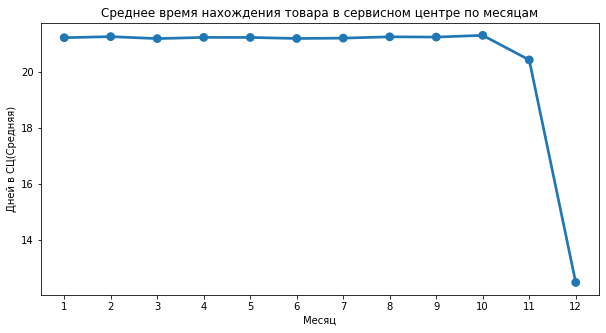

In [48]:
# Вывод результата на график.
plt.figure(figsize=(10,5))
ax = sns.pointplot(x=df_mean_month['Месяц'], y=df_mean_month['Средняя по сроку в СЦ'], data=df_mean_month)
plt.title('Cреднее время нахождения товара в сервисном центре по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Дней в СЦ(Средняя)')
plt.xticks(rotation=0);

### Динамика по неделям в разрезе регионов.

In [16]:
# catalog.sort_values(by='Наименование региона филиала').head(15)
list_region = catalog['Наименование региона филиала'].unique().tolist()
pd.DataFrame({'Регион': list_region})

,Регион
0,Верхняя Волга
1,Центральный
2,Черноземье
3,Приволжский
4,Средняя Волга
5,Урал
6,Западная Сибирь
7,Юг
8,Дальний Восток
9,Восточная Сибирь


### Фильтр данных разделяющий по регионам.

In [17]:
def filter_region(index_region):
    """Функция фильтрует СЦ по регионам"""
    # Упорядочивание по рерионам
    list_region = catalog['Наименование региона филиала'].unique().tolist()
    # Новый фрейм с регионами
    region = pd.DataFrame({'Регион':list_region})
    # region


    # Получение списка(Кодов) филиалов конкретного региона >>> для получения другого списка, нужно изменить индекс региона.
    df_identificator = catalog['Идентификатор филиала'].loc[catalog['Наименование региона филиала'] == region['Регион'][index_region]]
    list_identificator = df_identificator.to_list()
    # list_identificator


    # Фильтр по регионам.
    frames = []
    for i in range(len(list_identificator)):
        frames += [df.loc[df['Идентификатор_филиалы_документа'] == list_identificator[i]]]
    df_region = pd.concat(frames)

    return df_region



def dynamics_region(index_region):
    """Функция вычисляет динамику среднего время нахождения товара в сервисном центре"""
    
    # Расчет среднего кол-ва дней по неделям
    df_region = filter_region(index_region) # Наследует др.функцию.
    df_week = pd.DataFrame({'# Недели': df_region['Неделя_x'], 'Срок в СЦ': df_region['Срок гарантийного обслуживания']})
    df_week = df_week.groupby('# Недели').mean().reset_index()

    return df_week

,# Недели,Срок в СЦ
0,1,18.147819
1,2,18.552353
2,3,18.567014
3,4,18.244917
4,5,18.559179
5,6,18.597184
6,7,18.425967
7,8,18.180275
8,9,18.237187
9,10,18.651049


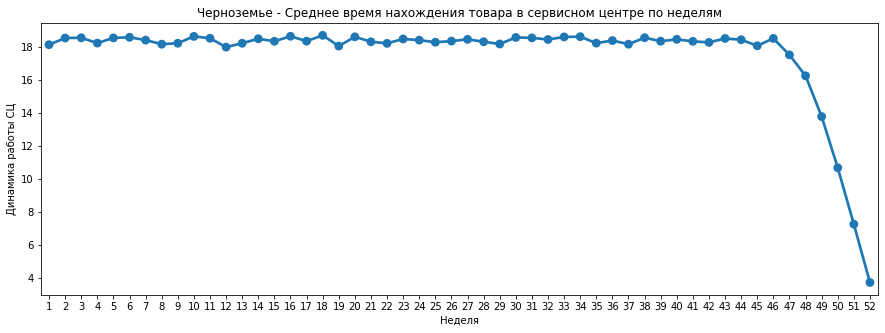

In [56]:
# Регион
# 0	Верхняя Волга
# 1	Центральный
# 2	Черноземье
# 3	Приволжский
# 4	Средняя Волга
# 5	Урал
# 6	Западная Сибирь
# 7	Юг
# 8	Дальний Восток
# 9	Восточная Сибирь

# Для получения отчета введите индекс из списка регионов.
region_index = 2 # <<<


df_week = dynamics_region(region_index)

# Вывод результата на график.
plt.figure(figsize=(15,5))
sns.pointplot(x=df_week['# Недели'], y=df_week['Срок в СЦ'], data=df_week)
plt.title(f'{list_region[region_index]} - Cреднее время нахождения товара в сервисном центре по неделям')
plt.xlabel('Неделя')
plt.ylabel('Динамика работы СЦ')
plt.xticks(rotation=0); 

df_week

###  Нормативный срок по всей компании.

In [34]:
# Формирование первой колонки.
df_month = df.loc[df['Месяц_x'] == 1] # Выборка из фрейма по 1му месяцу.
df_test = pd.DataFrame(df_month['Срок гарантийного обслуживания'].value_counts().sort_index()) # Группировка данных по колличеству заявок(использую колонку сроки, так как ее проще посчитать).

# Длина списка месяцев.
length = len(df['Месяц_x'].value_counts())

# Матрица на основе алгоритма первой колонки.
for i in range(length+1):
    df_month = df.loc[df['Месяц_x'] == i]
    df_test[i] = pd.DataFrame(df_month['Срок гарантийного обслуживания'].value_counts().sort_index())

# Удаление мусорных колонок.
df_month = df_test.drop(columns=['Срок гарантийного обслуживания',0])

In [36]:
df_month

,1,2,3,4,5,6,7,8,9,10,11,12
1.0,2493,2228,2581,2330,2568,2424,2546,2536,2441,2609,2344,2575.0
2.0,2530,2267,2541,2454,2543,2490,2540,2481,2451,2487,2448,2404.0
3.0,2492,2294,2541,2486,2520,2514,2524,2495,2427,2520,2493,2401.0
4.0,2542,2252,2629,2497,2549,2460,2556,2514,2435,2532,2418,2261.0
5.0,2595,2282,2578,2485,2562,2431,2495,2532,2482,2456,2506,2200.0
6.0,2536,2335,2433,2442,2491,2463,2519,2518,2462,2541,2434,2120.0
7.0,2481,2252,2641,2479,2428,2407,2529,2505,2396,2560,2469,1992.0
8.0,2522,2304,2574,2456,2584,2350,2521,2453,2414,2534,2384,1969.0
9.0,2483,2333,2516,2409,2641,2456,2565,2553,2498,2530,2464,1843.0
10.0,2501,2310,2508,2524,2583,2448,2550,2522,2446,2442,2492,1844.0


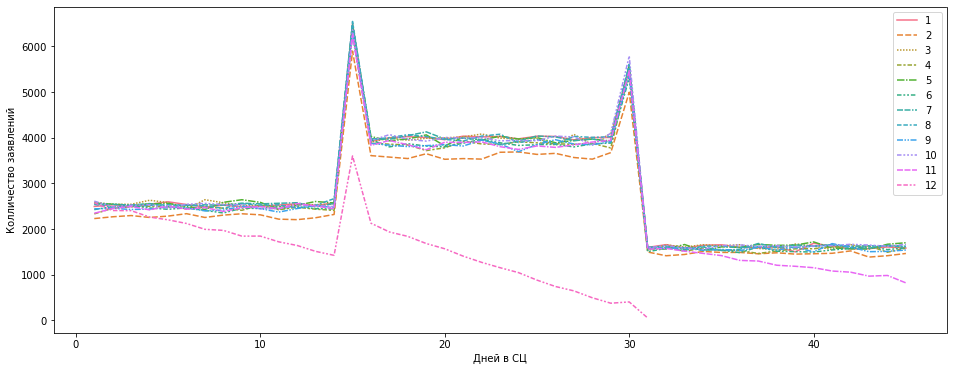

In [52]:
# Вывод на график
# Вывод результата на график.
plt.figure(figsize=(16,6))
sns.lineplot(data=df_month)
plt.xlabel('Дней в СЦ')
plt.ylabel('Колличество заявлений');

Нормативный срок по всей компании, среднего времени нахождения товара в сервисном центре показывает:  
- Сроки нахождения твара в СЦ делятся на три основные категории до 15, от 15 до 30, от 30 и выше.  
- Первую часть(1/3) заявок в СЦ старается обработать за быстро от от 1 до 15 дней, причем 15.5% заявок из этого периода отрабатывают на 15 день.  
- Вторую часть заявок в СЦ обрабатывается в срок от 16 до 30 дней. Замечу, что кол-во товаров находящихся в СЦ в этот период значительно выше первого периода. Причем ~9% заявок из этого периода отрабатывают на 30 день.  
- Третью часть заявок где срок составляет период от 31 до 45 дней, СЦ отрабатывает в течении года равномерно, кол-во таких заявок значительно ниже первых двух частей.
- Исключениями служат Три месяца Февраль, Ноябрь и Декабрь.   
а) В феврале замечается снижение количества заявок обрабатываемых до 30 дней.  
б) В Ноябрь замечается значительное снижение заявок обрабатываемых в период от 31 до 45 дней.  
в) В Декабре же колличество заявок активно сремится к нулю, хотя патерны общего поведения у этих заявок также прослеживаются. Здесь важно отметить, что кол-во товаров(заявок) находящихся в СЦ в период до 15 дней значительно снижается в отличии от других месяцев, а в период от 16 до 31 дня падает до 0.

***Заключение***: Основываясь на полученных статистических данных, можно вывести три нормативных срока по всей компании:
- 1) от 0 до 15 дней - для простого ремонта.
- 2) от 16 до 30 дней - для ремонта средней тяжести при наличии зап.частей.
- 3) от 30 до 45 дней - для случаев где требуется серьезный и длительный ремонт, а так же заказ зап.частей.

### Графическая динамика отклонения от нормы по каждому региону. (В процессе).

In [39]:
# Регион
# 0	Верхняя Волга
# 1	Центральный
# 2	Черноземье
# 3	Приволжский
# 4	Средняя Волга
# 5	Урал
# 6	Западная Сибирь
# 7	Юг
# 8	Дальний Восток
# 9	Восточная Сибирь

# Для получения отчета введите индекс из списка регионов.
region_index = 1 # <<<



df_std_dev = filter_region(region_index)
df_std_dev

,Идентификатор_товара,Дата_документа_x,Неделя_x,Месяц_x,Идентификатор_филиалы_документа,Вид_операции_документа_x,Дата_документа_y,Неделя_y,Месяц_y,Вид_операции_документа_y,Срок гарантийного обслуживания
7,b' \xe6\x8dGP\x19\xcd\x0bc2\xcc9\xae7\x1a;',2019-01-01,1,1,b'\xe4\x04!)\xa7l\xb0B#=i\xf8\x89\x1a\x8b\x1f',Прием товара,2019-01-09,2.0,1.0,Выдача товара,8.0
51,b'\x0c\xa6\xb3\x15\xde#\xf1o\xf5\x91.\xf6\xba\...,2019-01-01,1,1,b'\xe4\x04!)\xa7l\xb0B#=i\xf8\x89\x1a\x8b\x1f',Прием товара,2019-01-12,2.0,1.0,Выдача товара,11.0
295,b'>s\x00A\xa4\x99\x82\xaa4\x16\xd3\x0b\xcc~\x81W',2019-01-01,1,1,b'\xe4\x04!)\xa7l\xb0B#=i\xf8\x89\x1a\x8b\x1f',Прием товара,2019-01-15,3.0,1.0,Выдача товара,14.0
545,b'\xe5D\xf1\x86\x84\xc1k\\\xf3\x997\x1dd\xd9`\...,2019-01-01,1,1,b'\xe4\x04!)\xa7l\xb0B#=i\xf8\x89\x1a\x8b\x1f',Прием товара,2019-01-12,2.0,1.0,Выдача товара,11.0
554,b'=\xd3\xf1\xef2\x96\x8bP\x17\x91\xceUs[\xa1\r',2019-01-01,1,1,b'\xe4\x04!)\xa7l\xb0B#=i\xf8\x89\x1a\x8b\x1f',Прием товара,2019-01-09,2.0,1.0,Выдача товара,8.0
...,...,...,...,...,...,...,...,...,...,...,...
1369419,b'\x87k\xb7#\xaf`6]\x1b\x087.\x18\xfeIy',2019-11-30,48,11,"b""\xafO\xa3#\t'\x92L\xf0\x0f\xef\x95\xa9$s)""",Прием товара,2020-01-01,1.0,1.0,Выдача товара,32.0
1371279,b'\x9e\xde\xb6\xf2\xfbz\xb5\x9e\x07\xa3\x89cv\...,2019-11-30,48,11,"b""\xafO\xa3#\t'\x92L\xf0\x0f\xef\x95\xa9$s)""",Прием товара,2020-01-01,1.0,1.0,Выдача товара,32.0
1374601,"b'\xc6\xa0{\x89 a\xd4\'\xf2\xdd\xe4""\xdd\x90II'",2019-12-01,48,12,"b""\xafO\xa3#\t'\x92L\xf0\x0f\xef\x95\xa9$s)""",Прием товара,2020-01-01,1.0,1.0,Выдача товара,31.0
1374788,b'\xab\xe6Q\x11\xf6\xbfb\x94F\xc3\xb6\xd3\x89\...,2019-12-01,48,12,"b""\xafO\xa3#\t'\x92L\xf0\x0f\xef\x95\xa9$s)""",Прием товара,2019-12-31,1.0,12.0,Выдача товара,30.0


### Метод наименьших квадратов.

In [40]:
# Получение среднего значения(нормы) за год по региону.
norm = dynamics_region(region_index)['Срок в СЦ'].mean()
norm

20.200113063428656

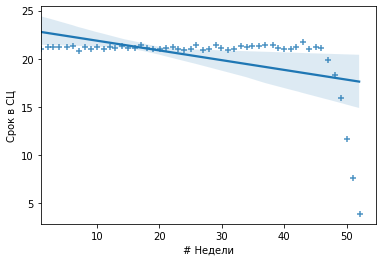

In [62]:
sns.regplot(data=test, x="# Недели", y="Срок в СЦ", x_jitter=.15, marker="+");

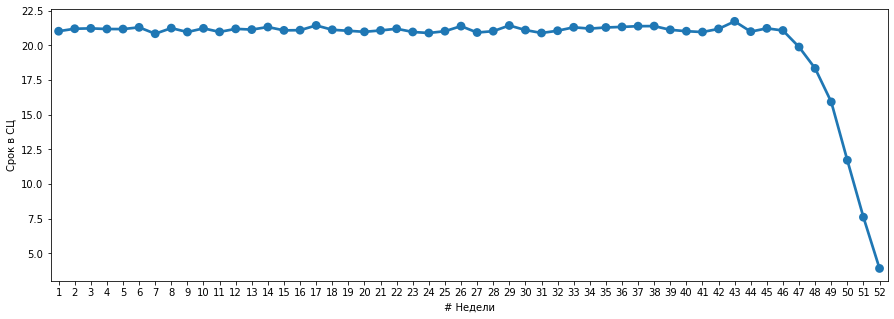

In [55]:
plt.figure(figsize=(15,5))
sns.pointplot(data=test, x="# Недели", y="Срок в СЦ")

In [45]:
test = dynamics_region(region_index)
test.head()

,# Недели,Срок в СЦ
0,1,21.022536
1,2,21.201928
2,3,21.227226
3,4,21.181795
4,5,21.176545


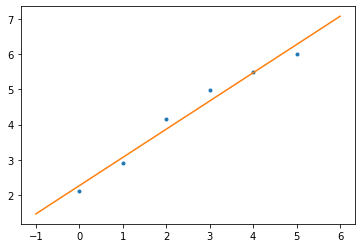

In [43]:
import numpy as np

x = np.array([0,1,2,3,4,5])
y = np.array([2.1, 2.9, 4.15, 4.98, 5.5, 6])

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#plotting
import matplotlib.pyplot as plt
xp = np.linspace(-1, 6, 100)
plt.plot(x, y, '.', xp, p(xp))
plt.show()